## Linear Regression


In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

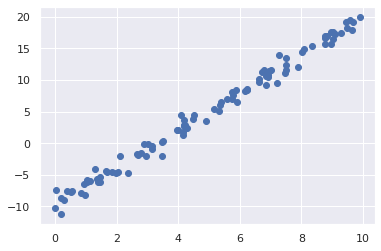

In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(100) # but still one input variable!
y = 3*x - 10 + rng.randn(100) # adding some noise (choosing a Gaussian noise model)
plt.scatter(x, y);

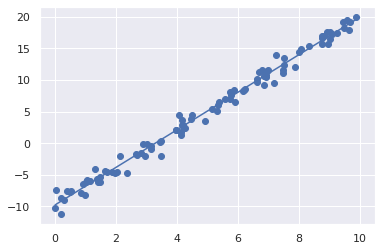

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y) # np.newaxis creates a 'bias' to be trained

xfit = np.linspace(0, 10, 1000) # creates a 1000 data points between 0 and 10
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [ ]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     2.9684925087655323
Model intercept: -9.763042745851093


## Using the Sigmoid Activation Function


https://github.com/jonasbostoen/simple-neural-network/blob/master/training_version.py

In [ ]:
# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# get the derivative to find the weights
def sigmoid_derivative(x):
    return x * (1 - x)



In [ ]:
# input data
training_inputs = np.array([[0,0,1],
                            [1,1,1],
                            [1,0,1],
                            [0,1,1]])

# output data
training_outputs = np.array([[0,1,1,0]]).T

# fixing the random output
np.random.seed(1)

# initialize weights randomly with mean 0 to create weight matrix, synaptic weights
synaptic_weights = 2 * np.random.random((3,1)) - 1

print('Random starting synaptic weights: ')
print(synaptic_weights)


Random starting synaptic weights: 
[[-0.16595599]
 [ 0.44064899]
 [-0.99977125]]


In [ ]:
# Iterate 1000 times
for iteration in range(1000):

    # Define input layer
    input_layer = training_inputs
    # Normalize the product of the input layer with the synaptic weights
    outputs = sigmoid(np.dot(input_layer, synaptic_weights))

    # how much did we miss?
    error = training_outputs - outputs

    # multiply how much we missed by the
    # slope of the sigmoid at the values in outputs
    adjustments = error * sigmoid_derivative(outputs)

    # update weights
    synaptic_weights += np.dot(input_layer.T, adjustments)

print('Synaptic weights after training: ')
print(synaptic_weights)

print("Output After Training:")
print(outputs)

Synaptic weights after training: 
[[ 7.36554448]
 [-0.21572569]
 [-3.46882433]]
Output After Training:
[[0.03022687]
 [0.9754097 ]
 [0.98008635]
 [0.02450517]]


## Principal Component Analysis

https://github.com/dhamvi01/Principal-Component-Analysis-PCA---Python/blob/master/PCA.ipynb

In [23]:

import pandas as pd
from sklearn.preprocessing import StandardScaler

In [24]:

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])

In [25]:

df.head()

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [26]:

feature = ['sepal length', 'sepal width', 'petal length', 'petal width']

# separating features
x = df.loc[:,feature]

# separating target
y = df.loc[:,'target']

#Standardising features
x = StandardScaler().fit_transform(x)

In [27]:

from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pct = pca.fit_transform(x)

principal_df = pd.DataFrame(pct,columns=['pc1','pc2'])

finaldf= pd.concat([principal_df,df[['target']]],axis=1)

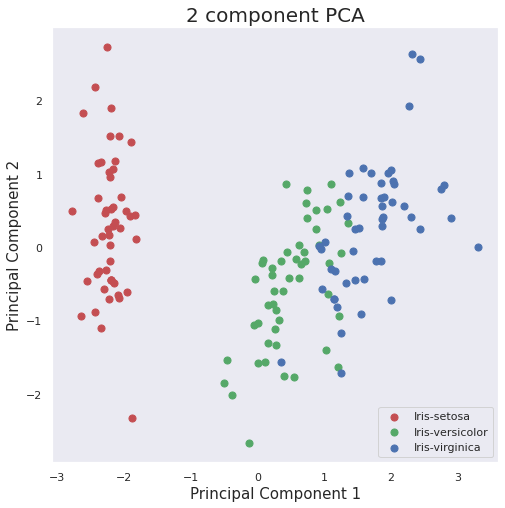

In [28]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['target'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'pc1']
               , finaldf.loc[indicesToKeep, 'pc2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()
plt.show()